<a href="https://colab.research.google.com/github/aamorfatti/Data-Analytics-Essential/blob/main/Tugas_3_DAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Ensure plots display inline in Colab
%matplotlib inline

In [ ]:
# 2. Read the dataset
df = pd.read_csv("/content/TGM 2020-2023_eng.csv", sep=";")



In [ ]:
# 3. Reading interest BEFORE normalization
reading_col = "Tingkat Kegemaran Membaca (Reading Interest)"

# List of columns with numeric values stored as strings (with commas)
numeric_cols_with_commas = [
    "Reading Frequency per week",
    "Number of Readings per Quarter",
    "Daily Reading Duration (in minutes)",
    "Internet Access Frequency per Week",
    "Daily Internet Duration (in minutes)",
    reading_col
]

for col in numeric_cols_with_commas:
    if col in df.columns:
        # Replace commas with dots
        df[col] = df[col].astype(str).str.replace(',', '.')
        # Convert to numeric
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Fill missing with median
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Missing values in '{col}' filled with median: {median_val}")


Missing values in 'Reading Frequency per week' filled with median: 4.75
Missing values in 'Number of Readings per Quarter' filled with median: 4.5
Missing values in 'Daily Reading Duration (in minutes)' filled with median: 97.2
Missing values in 'Internet Access Frequency per Week' filled with median: 5.5
Missing values in 'Daily Internet Duration (in minutes)' filled with median: 113.7
Missing values in 'Tingkat Kegemaran Membaca (Reading Interest)' filled with median: 62.195


In [ ]:
# 4. Detect and remove outliers using the IQR method
def remove_outliers_iqr(data, cols):
    data_clean = data.copy()
    for c in cols:
        Q1 = data_clean[c].quantile(0.25)
        Q3 = data_clean[c].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = data_clean[(data_clean[c] < lower_bound) | (data_clean[c] > upper_bound)].index
        print(f"Column '{c}': {len(outlier_indices)} outliers detected.")
        data_clean = data_clean.drop(index=outlier_indices)
    return data_clean

# Identify numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols, "\n")

# Remove outliers from numeric columns
df_no_outliers = remove_outliers_iqr(df, numeric_cols)
print("\nShape after outlier removal:", df_no_outliers.shape)


Numeric columns: ['Year', 'Reading Frequency per week', 'Number of Readings per Quarter', 'Daily Reading Duration (in minutes)', 'Internet Access Frequency per Week', 'Daily Internet Duration (in minutes)', 'Tingkat Kegemaran Membaca (Reading Interest)'] 

Column 'Year': 0 outliers detected.
Column 'Reading Frequency per week': 13 outliers detected.
Column 'Number of Readings per Quarter': 0 outliers detected.
Column 'Daily Reading Duration (in minutes)': 3 outliers detected.
Column 'Internet Access Frequency per Week': 39 outliers detected.
Column 'Daily Internet Duration (in minutes)': 7 outliers detected.
Column 'Tingkat Kegemaran Membaca (Reading Interest)': 1 outliers detected.

Shape after outlier removal: (77, 9)


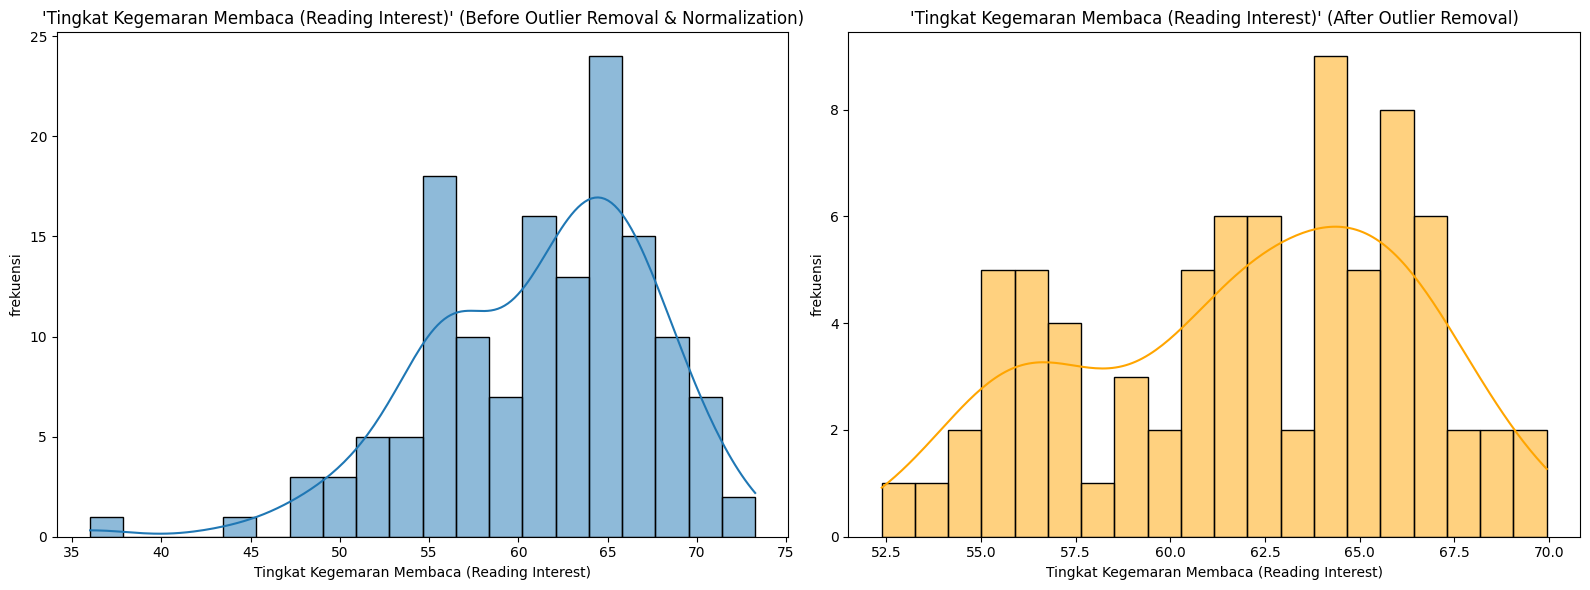

In [ ]:
#5. Create a figure and a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the first histogram on the first subplot (axes[0])
sns.histplot(df[reading_col], bins=20, kde=True, ax=axes[0])
axes[0].set_title(f"'{reading_col}' (Before Outlier Removal & Normalization)")
axes[0].set_xlabel(reading_col)
axes[0].set_ylabel("frekuensi")

# Plot the second histogram on the second subplot (axes[1])
sns.histplot(df_no_outliers[reading_col], bins=20, kde=True, color='orange', ax=axes[1])
axes[1].set_title(f"'{reading_col}' (After Outlier Removal)")
axes[1].set_xlabel(reading_col)
axes[1].set_ylabel("frekuensi")

plt.tight_layout()
plt.show()